<a href="https://colab.research.google.com/github/nishay324/Loan-Prediction-/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Loan Prediction 
It is a classification problem where we have to predict whether a loan would be approved or not.
##Problem statement
Dream Housing Finance company deals in all home loans. They have presence across all urban , semi urban and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a  loan. Company wants to automate the loan eligibility process(real time) based on customer details provided while filling online application form. These details are Gender, Marital status, Education, Number of dependents, Income, Loan Amount, Credit history and others. To automate this process, they have given a problem to identify to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
##Hypothesis Generation
Below are some of the factors which i think can affect the loan approval(Dependent variable for this loan prediction problem):


1.   Salary : Applicants with high income should have more chances of Loan approval.
2.   Previous Credit history: Applicants who have repayed their previous debts should have higher chances of loan approval.
3. Loan amount : loan approval should also depend on loan amount. If the loan amount is less, chances of loan approval should be very high.
4. Loan term : Loan for less time period and less amount should have high chances of approval.
5. EMI : Lesser the amount to be paid monthly to repay the loan , higher should be the chances of loan approval.




#Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# Reading data

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')

In [3]:
train_original = train.copy()

In [4]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
train.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Understanding the Data

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.shape

(614, 13)

There are 614 rows and 13 columns in the given dataset.

In [8]:
train.index

RangeIndex(start=0, stop=614, step=1)

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have 12 independent variables and 1 target variables in train dataset i.e Loan_Status in the train dataset.
Data type of Loan_Status is in object format which means it is catagorical.
For catagorical variable we can use frequency table or bar plots which will calculate the number of each catagory in a particular variable.

#Exploratory Data Analysis

## Univariate analysis

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize= True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Figure size 288x288 with 0 Axes>

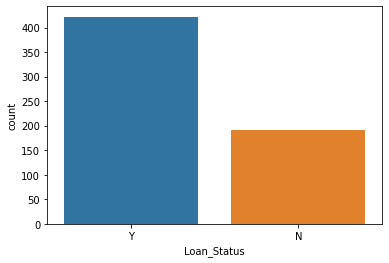

<Figure size 288x288 with 0 Axes>

In [12]:
sns.countplot(train['Loan_Status'])
plt.figure(figsize=(4,4))

The loan of 422(around 69%) people out of 614 was approved.


1. Categorical features : Gender , Married ,Self_employed , credit    
history , loan_status.
2. Ordinal features : Dependent , Education , Property_area.
3. Numerical features : Applicant Income , Co-applicant income , loan amount , loan term.




### Independent variable ( categorical)

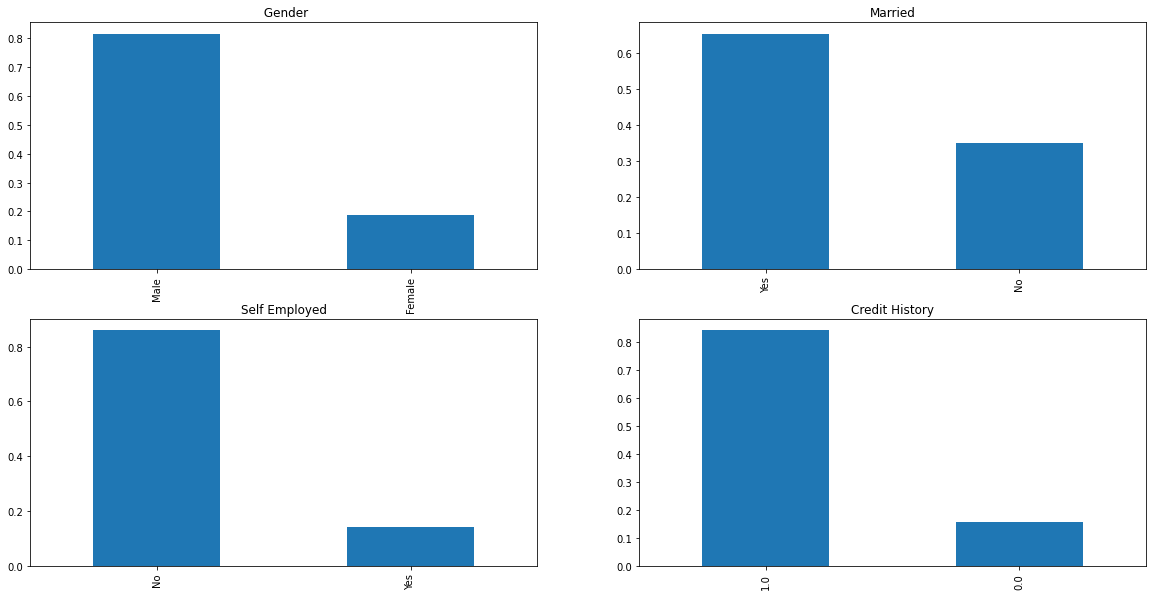

In [13]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize= True).plot.bar(figsize=(20,10) , title = ' Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True ).plot.bar(title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed',)
plt.subplot(224)
train['Credit_History'].value_counts(normalize= True).plot.bar(title = 'Credit History')
plt.show()

It can be inferred from the above bar plots that :


1.   80 % of the applicants in the dataset are male.
2.   Around 65 %  of the applicants are married.
3.   Around 15 % of the applicants are self employed.
4.   Around 85 % of the applicants have repaid their debts.


### Independent variable ( ordinal)

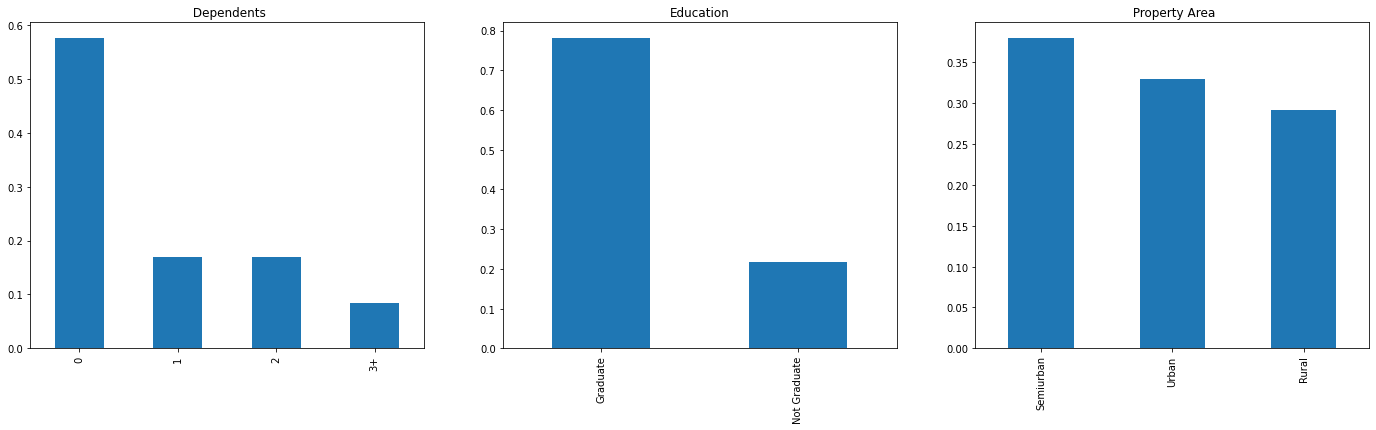

In [14]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize= True).plot.bar( figsize= (24,6) ,
                                                        title = ' Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts( normalize = True).plot.bar(title = ' Property Area')
plt.show()

Following inferences can be made from the above bar plot:


1.   Most of the applicants have Zero dependents.
2.   Around 80 % of the applicants are Graduate.
3.Most of the applicants are from Semiurban area.



### Independent variable ( Numerical)

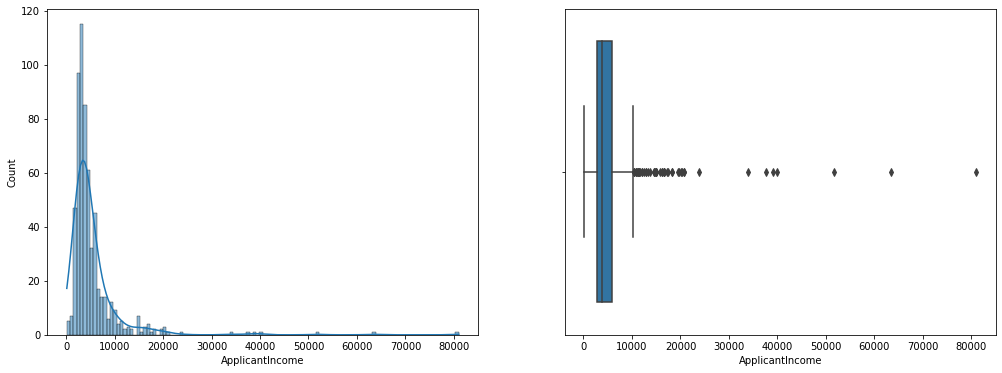

In [15]:
plt.figure(1, figsize=(17,6))
plt.subplot(121)
sns.histplot(train['ApplicantIncome'] , kde= True)

plt.subplot(122)
sns.boxplot(train['ApplicantIncome']);
plt.show()


It can be inferred that most of the data in the distribution is towards the left which means the distribution is not normal. 
The boxplot confirms the presence of a lot of outliers. This can be attributed to income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education :

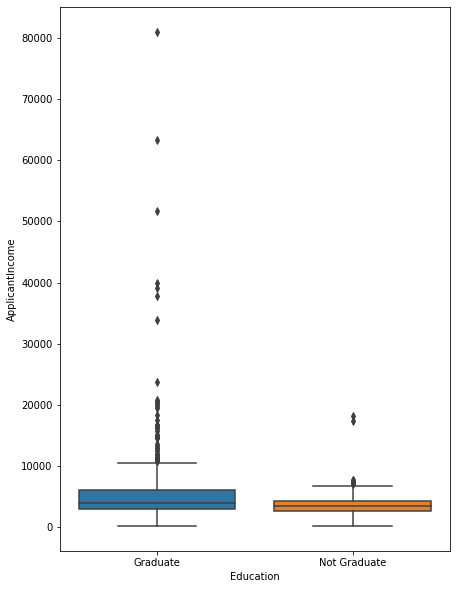

In [16]:
plt.figure(1 , figsize=(7,10))
sns.boxplot( x= train['Education'], y= train['ApplicantIncome']);



We can see that there are higher number of graduates with very high income, which are appearing to be outliers.
Lets look at the Coapplicants Income:

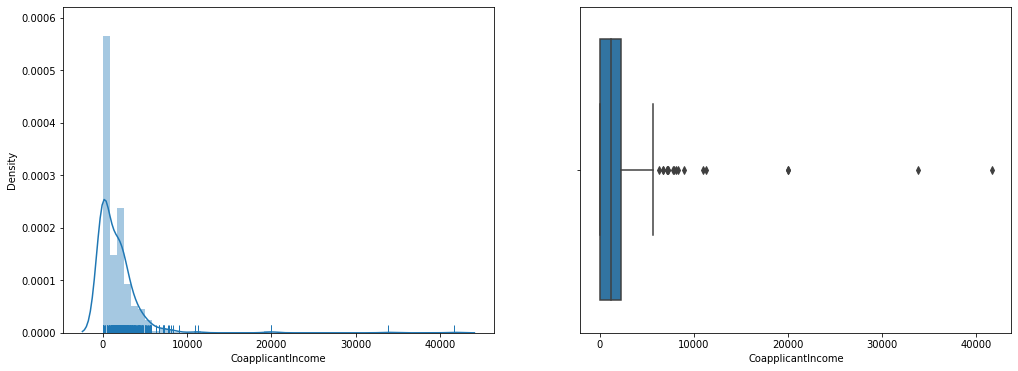

In [17]:
plt.figure(1, figsize=(17,6))

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'] , kde= True , rug= True)
plt.subplot(122)
sns.boxplot(train['CoapplicantIncome'] )
plt.show()

Majority of the Coapplicant's Income lies between 0 and 5000. We also see a lot of outliers in the Coapplicant's income and it is not normally distributed .
Let's look at the distribution of Loan amount distribution:

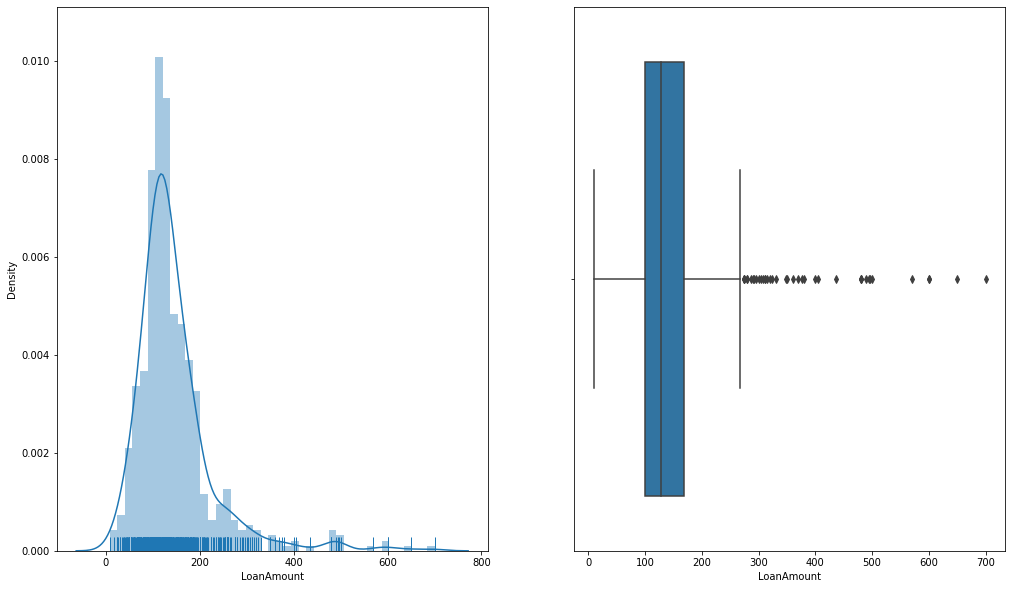

In [18]:
plt.figure(1, figsize=(17,10))

plt.subplot(121)
sns.distplot( train['LoanAmount'] , rug= True , kde= True )
plt.subplot(122)
sns.boxplot(train['LoanAmount'])
plt.suptitle=('Loan Amount')
plt.show()

We see a lot of outliers in this distribution and it is fairly normal distribution. We will treat the outliers in later section.
Now we would like to know how well these features to correlate with loan status .

##Bivariate Analysis

After looking at every variable individually in univarite analysis, we will explore them again with respect to target variable.

### Categorical independent variable Vs Target variable
First we will find relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved or unapproved loans. 

1. Gender vs Loan status
1.   Married vs Loan Status
2.   Self employed vs Loan Status
3.   credit History vs Loan Status
4. Education vs Loan Status
5.Property area vs Loan Status
6. Dependent vs Loan Status

1. Gender vs Loan status

In [19]:
pd.crosstab(train.Gender , train.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [20]:
print("Percentage of female whose loan got approved :" , 75/(37+75) *100 , "%")
print("Percentage of Male whose loan got approved :" , 339/(339+150) *100 , "%") 

Percentage of female whose loan got approved : 66.96428571428571 %
Percentage of Male whose loan got approved : 69.32515337423312 %


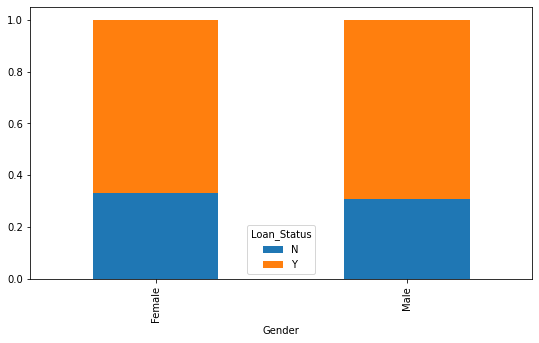

In [21]:

gender =pd.crosstab(train.Gender , train.Loan_Status)

gender.div( gender.sum(1).astype(float), axis= 0).plot(kind= "bar" , stacked = True , figsize = (9,5))

plt.show()


2. Married vs Loan Status




In [22]:
married= pd.crosstab(train.Married , train.Loan_Status)

In [23]:
married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [24]:
print("Percentage of applicants who are married and got approved loan: " ,285/(113+285) * 100 , "%")
print("Percentage of applicants who are unmarried and got approved loan: " , 134/(79+134) *100, "%" )

Percentage of applicants who are married and got approved loan:  71.60804020100502 %
Percentage of applicants who are unmarried and got approved loan:  62.91079812206573 %


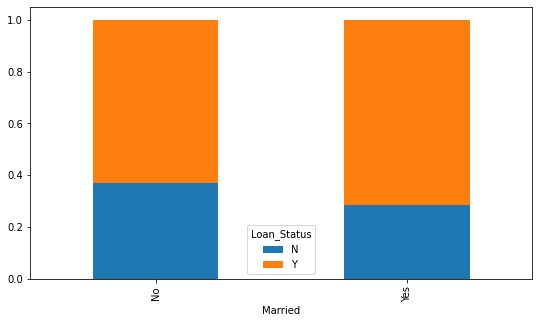

In [25]:
married.div( married.sum(1).astype(float), axis= 0).plot(kind= "bar" ,
                                            stacked = True ,figsize=(9,5) )
plt.show()

3.  Self employed vs Loan Status

In [26]:
self_employed= pd.crosstab(train.Self_Employed , train.Loan_Status)
self_employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [27]:
print("Percentage of applicants who are self employed got approved loan: ", 56/(26+56) *100 ,"%")
print("Percentage of applicants who are not self employed and got approved loan: ", 343/(157+343) * 100, "%")

Percentage of applicants who are self employed got approved loan:  68.29268292682927 %
Percentage of applicants who are not self employed and got approved loan:  68.60000000000001 %


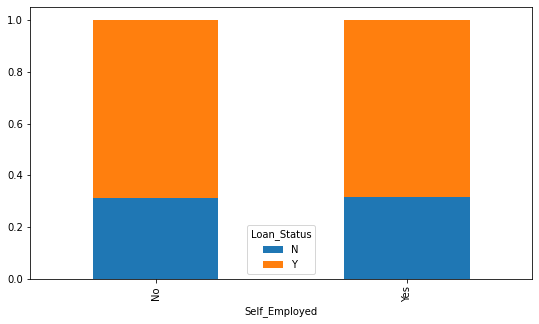

In [28]:
self_employed.div( self_employed.sum(1).astype(float), axis= 0).plot(kind= "bar",
                                            stacked = True ,figsize=(9,5) )
plt.show()

4.  Credit History vs Loan Status

In [29]:
credit_history = pd.crosstab(train.Credit_History , train.Loan_Status)
credit_history

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [30]:
print("Percentage of applicants with credit history 1 and got approved loan: ", 378/(97+378) * 100 , "%")
print("Percentage of applicants with credit history 0 and got approved loan: ", 7/(7+82) * 100 , "%")

Percentage of applicants with credit history 1 and got approved loan:  79.57894736842105 %
Percentage of applicants with credit history 0 and got approved loan:  7.865168539325842 %


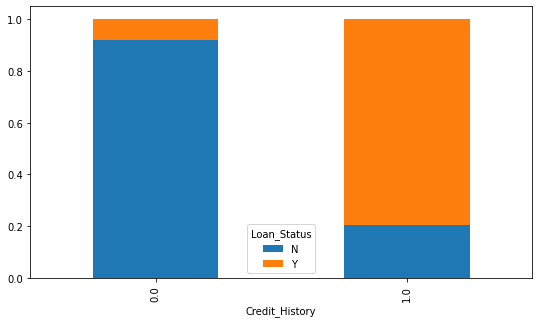

In [31]:
credit_history.div(credit_history.sum(1).astype(float), axis= 0).plot(kind="bar", 
                                                            stacked= True, figsize=(9,5) )
plt.show()

5.  Education vs Loan Status

In [32]:
education= pd.crosstab(train.Education , train.Loan_Status)
education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [33]:
print("Percentage of applicants who are graduate and got approved loan: ", 340/(340+140) * 100, "%")
print("Percentage of applicants who are not graduate and got approved loan: ", 82/(82+52) *100 ,"%")

Percentage of applicants who are graduate and got approved loan:  70.83333333333334 %
Percentage of applicants who are not graduate and got approved loan:  61.19402985074627 %


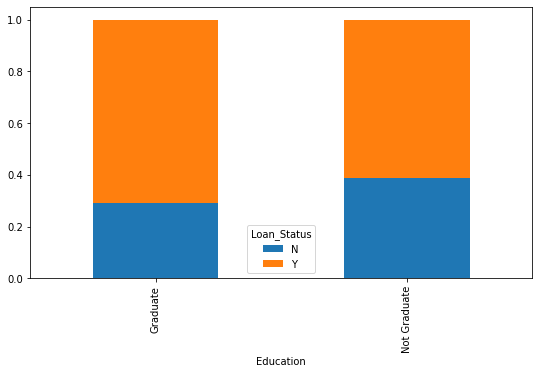

In [34]:
education.div(education.sum(1).astype(float) , axis=0).plot(kind = "bar" , 
                                                            stacked= True ,figsize=(9,5) )
plt.show()


6. Property area vs Loan status

In [35]:
property_area = pd.crosstab(train.Property_Area , train.Loan_Status)
property_area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [36]:
print("Percentage of applicants having property in Rural area and got approved loan: ", 110/(69+110) * 100, "%")
print("Percentage of applicants having property in semiurban area and got approved loan: ", 179/(179+54) *100, "%")
print("Percentage of applicants having property in urban area and got approved loan: ", 133/(133+69) *100, "%")

Percentage of applicants having property in Rural area and got approved loan:  61.452513966480446 %
Percentage of applicants having property in semiurban area and got approved loan:  76.82403433476395 %
Percentage of applicants having property in urban area and got approved loan:  65.84158415841584 %


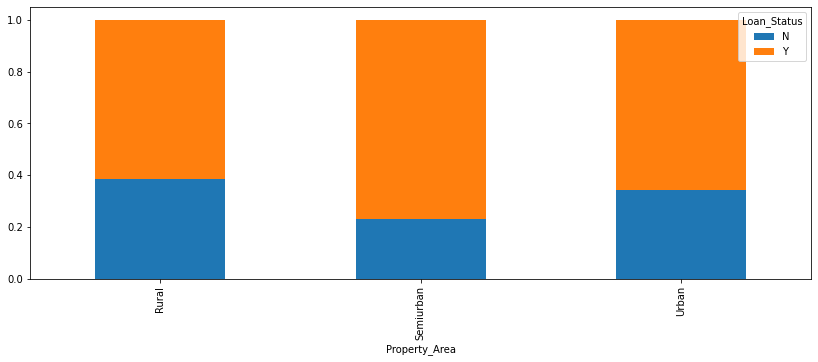

In [37]:
property_area.div(property_area.sum(1).astype(float) , axis=0).plot( kind="bar" , 
                                                                    stacked= True,figsize=(14,5)  )
plt.show()

7.  Dependents vs Loan Status

In [38]:
dependent= pd.crosstab(train.Dependents , train.Loan_Status)
dependent

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [39]:
print("Percentage of applicants having no dependents and got approved loan: ", 238/(107+238) *100, "%")
print("Percentage of applicants having one dependent and got approved loan: ", 66/(36+66) *100, "%")
print("Percentage of applicants having two dependents and got approved loan: ", 76/(25+76) *100, "%")
print("Percentage of applicants having three or more dependents and got approved loan: ", 33/(33+18) *100, "%")

Percentage of applicants having no dependents and got approved loan:  68.98550724637681 %
Percentage of applicants having one dependent and got approved loan:  64.70588235294117 %
Percentage of applicants having two dependents and got approved loan:  75.24752475247524 %
Percentage of applicants having three or more dependents and got approved loan:  64.70588235294117 %


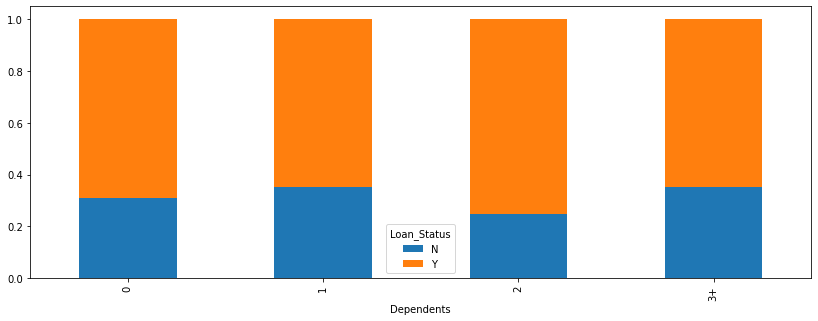

In [40]:

dependent.div(dependent.sum(1).astype(float) , axis=0).plot(kind="bar" ,
                                                            stacked=True,figsize=(14,5) )

plt.show()


Following inferrences can be made from the above stacked bar plots:


1.   The proportion of male and female is more or less the same for both approved and unapproved loan.
2.   The proportion of married applicants is higher for approved loans.
3.  Nothing significant can be inferred from Self employed vs Loan status bar plot.
4. People with credit history 1 are more likely to get approved loan.
5. Graduate applicants are more likely to get  approved loan.
6. Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban area.
7.Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan status.




### Numerical independent variable Vs Target variable

Now we will find the relation between the following:

1.   Applicant Income Vs Loan Status
2.   Co-applicants Income Vs Loan Status
5.  Total income Vs Loan status
3. Loan Amount Vs Loan Status
4.  Loan term Vs Loan Status



1.  Applicant Income Vs Loan Status

In [41]:
train.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

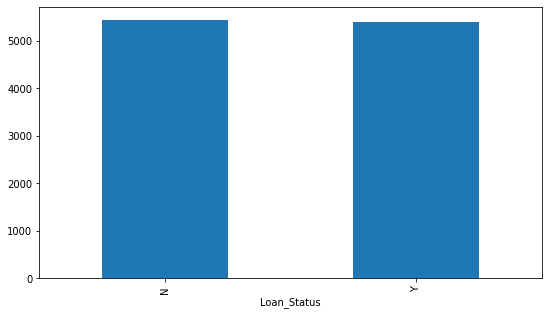

In [42]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot(kind= "bar" , figsize=(9,5))

We do not see any significant difference in the mean income.

Now we will make bins for Applicant Income variable based on the values in it to analyse the relation with Loan status.

In [43]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Minimum applicant income= 150         
Maximum applicant income = 81000

In [44]:
bins= [0, 2000 , 4000, 6000 , 81000]
groups= ['Low', 'Average','High','Very High']

In [45]:
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins, labels= groups)

In [46]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [47]:
applicant_income=pd.crosstab(train.Income_bin, train.Loan_Status)
applicant_income

Loan_Status,N,Y
Income_bin,,
Low,16,25
Average,85,208
High,45,98
Very High,46,91


In [48]:
print("Percentage of applicants having low income gets approved loan:" , 25/(16+25) *100,"%")
print("Percentage of applicants having average income gets approved loan:" , 208/(208+85) *100,"%")
print("Percentage of applicants having high income gets approved loan:" , 98/(45+98) *100,"%")
print("Percentage of applicants having very high income gets approved loan:" , 91/(91+46) *100,"%")




Percentage of applicants having low income gets approved loan: 60.97560975609756 %
Percentage of applicants having average income gets approved loan: 70.98976109215018 %
Percentage of applicants having high income gets approved loan: 68.53146853146853 %
Percentage of applicants having very high income gets approved loan: 66.42335766423358 %


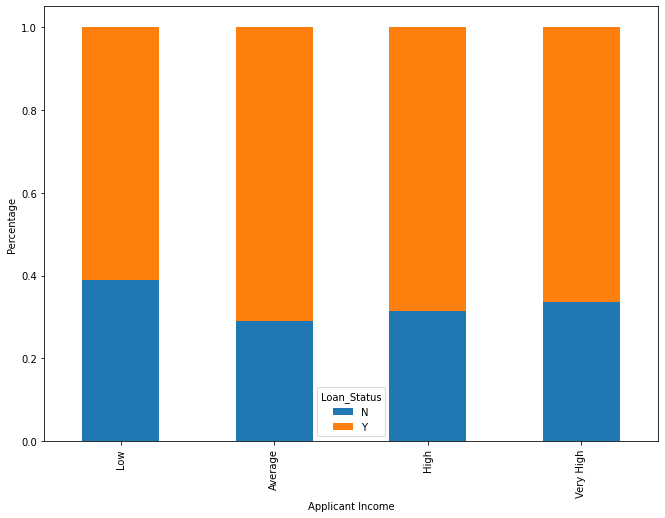

In [49]:
applicant_income.div(applicant_income.sum(1).astype(float), axis=0).plot(kind="bar" , stacked=True, figsize=(11,8))
plt.xlabel('Applicant Income')
plt.ylabel('Percentage');

It can be inferred from the above that the applicant income does not affect the loan approval which contradicts our hypothesis in which we assumed if applicant income is high the chances of loan approval will also be high.

2. Co-applicants income vs Loan Status

Minimum co-applicants income= 0.00           

Maximum co-applicants income = 41667

In [50]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean()

Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64

In [51]:
bin=[0 , 1000 , 3000, 42000]
group=['Low', 'Average','High']

In [52]:
train['coapplicant_income_bin']= pd.cut(train.CoapplicantIncome , bin , labels= group)

In [53]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,coapplicant_income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN


In [54]:
coapplicant_income= pd.crosstab(train.coapplicant_income_bin , train.Loan_Status)
coapplicant_income

Loan_Status,N,Y
coapplicant_income_bin,,
Low,3,19
Average,61,161
High,32,65


In [55]:
print("Percentage of applicant having low coapplicant income gets approved loan:" , 19/(3+19) *100 , "%")
print("Percentage of applicant having average coapplicant income gets approved loan :" , 161/(61+161) *100 , "%")
print("Percentage of applicant having high coapplicant income gets approved loan:", 65/(32+65) *100, "%")

Percentage of applicant having low coapplicant income gets approved loan: 86.36363636363636 %
Percentage of applicant having average coapplicant income gets approved loan : 72.52252252252252 %
Percentage of applicant having high coapplicant income gets approved loan: 67.0103092783505 %


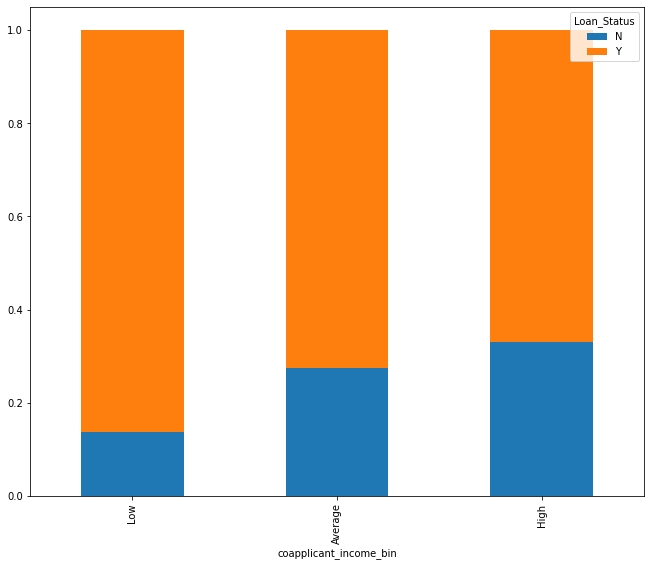

In [56]:
coapplicant_income.div(coapplicant_income.sum(1).astype(float), axis=0).plot(kind="bar" , stacked=True , figsize=(11,9))

The above graph shows that if coapplicants income is less the chances of loan approval is high. This does not look right. The possible reason behind this may be that most of the applicants don't have coapplicants so the coapplicant income for such applicant is 0 and hence loan approval is not dependent on it.

3.  Total income Vs Loan Status

As no significant relationship can be inferred from both Applicant income Vs Loan Status and Co-applicant income Vs Loan Status, we will make a new variable combining applicant income and co-applicant income to visualize the combined effect of income on loan status.

In [57]:
train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


In [58]:
bin_Total = [0 , 2500, 4000 , 6000 , 81000]
groups_Total=['Low' , 'Average' , 'High' , 'very high']

In [59]:
train['Total_income_bin'] = pd.cut(train['total_income'] , bin_Total , labels= groups_Total)

In [60]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,coapplicant_income_bin,total_income,Total_income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High


In [61]:
total_income= pd.crosstab(train.Total_income_bin , train.Loan_Status)
total_income

Loan_Status,N,Y
Total_income_bin,,
Low,14,10
Average,32,87
High,65,159
very high,81,166


In [62]:

print("Percentage of applicants having low total income gets approved loan:" , 10/(14+10) *100,"%")
print("Percentage of applicants having average total income gets approved loan:" , 87/(87+32) *100,"%")
print("Percentage of applicants having high total income gets approved loan:" , 159/(159+65) *100,"%")
print("Percentage of applicants having very high total income gets approved loan:" , 166/(166+81) *100,"%")




Percentage of applicants having low total income gets approved loan: 41.66666666666667 %
Percentage of applicants having average total income gets approved loan: 73.10924369747899 %
Percentage of applicants having high total income gets approved loan: 70.98214285714286 %
Percentage of applicants having very high total income gets approved loan: 67.20647773279353 %


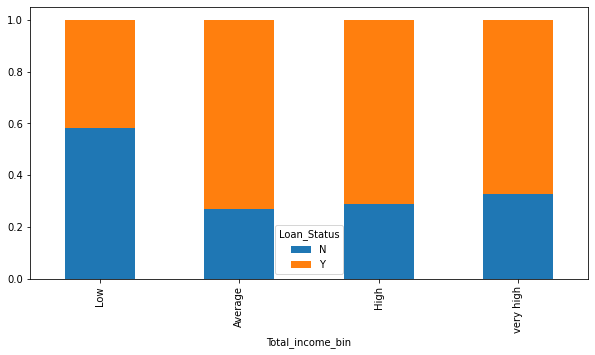

In [63]:
total_income.div(total_income.sum(1).astype(float) , axis=0).plot(kind='bar' , stacked = True , figsize= (10,5));

we can see that proportion of loans getting approved for applicant having low total income is very less as compared to that of applicants having average , high and very high total income. 

4.  Loan amount Vs Loan Status

From the dataset given above we find that:             
Minimum loan amount = 9        
Maximum loan amount = 700

In [64]:
bins=[0, 100 , 200 , 700]
group =['low', 'average','High']

In [65]:
train['loan_amount_bin']= pd.cut(train['LoanAmount'] , bins , labels= group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,coapplicant_income_bin,total_income,Total_income_bin,loan_amount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,very high,average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,average


In [66]:
loan_amount = pd.crosstab(train.loan_amount_bin , train.Loan_Status)
loan_amount

Loan_Status,N,Y
loan_amount_bin,,
low,47,107
average,103,255
High,31,49


In [67]:
print('Percentage of approved loans with low loan amount:' , 107/(47+107) *100 , "%")
print('Percentage of approved loans with average loan amount:' , 255/(103+255) *100 , "%")
print('Percentage of approved loans with low loan amount:' , 49/(31+49) *100 , "%")

Percentage of approved loans with low loan amount: 69.48051948051948 %
Percentage of approved loans with average loan amount: 71.22905027932961 %
Percentage of approved loans with low loan amount: 61.25000000000001 %


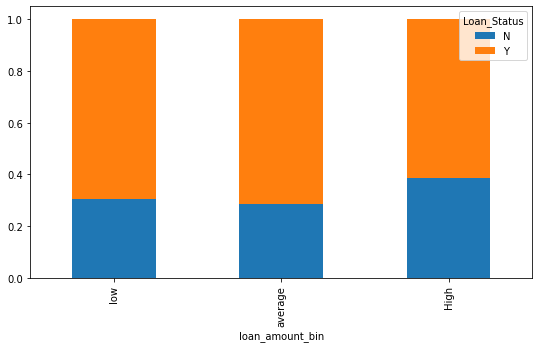

In [68]:
loan_amount.div(loan_amount.sum(1).astype(float) , axis= 0).plot(kind= 'bar' , stacked= True, figsize=(9,5));

It can be seen that proportion of approved loan is higher for low and average loan amount as compared to high loan amount which support our hypothesis.
Let's drop the bins which we created for exploration part.
We will also change 3+ to 3 in dependent variable to make it numerical variable. We will also convert target variable's  categories into 0 and 1 so that we can find its correlation with numerical variable. One more reason to do so is that models like logistic regression takes only numerical value as input.

In [69]:
cols=['Income_bin', 'coapplicant_income_bin', 'total_income', 'Total_income_bin','loan_amount_bin','Loan_ID']
train= train.drop(cols, axis=1)

In [70]:
train['Dependents'].replace('3+',3, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)
train['Loan_Status'].replace('N',0 , inplace= True)

###Correlation Matrix

Let's look at the correlation between all the numerical values. We will use heat map to visualize the correlation. Heatmap visualize the data through variation in colouring. The variables with darker colour means the correlation is more.

In [71]:
matrix = train.corr()

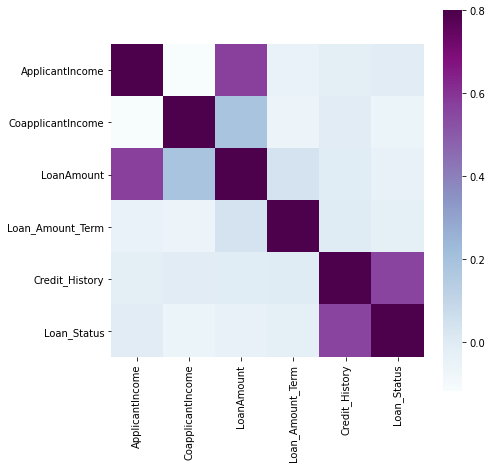

In [72]:
plt.figure(figsize=(7,7))
sns.heatmap( matrix, vmax= 0.8 , square= True , cmap= 'BuPu' )
plt.show()

we see that the most correlated variables are 


1.   ApplicantIncome vs Loan amount
2.   credit history vs loan status
3. Co-applicant income vs loan amount



# Missing values and Outlier treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse affect on the model performance. 

In [73]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender , Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History. 
We will treat the missing values in all the features one by one.   
                       

Methods to impute missing values :


*   For numerical variables : imputation using mean or median
*   For categorical variables : imputation using mode.



We will fill the missing values in Gender, Married, Dependents, Self Employed and Credit history using mode of the features.

In [74]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
train['Married'].fillna(train['Married'].mode()[0], inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace= True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace =True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

Filling missing value in loan term.

In [75]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [76]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0] , inplace= True)

Loan amount is a numerical varible, we can use mean or median to impute missing value. we will use median to impute missing values as earlier we saw Loan amount has outliers and mean is sensitive to outliers.

In [77]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

## Outlier Treatment

In univariate analysis we saw a lot of outliers in Loan amount variable. Outlier has a significant affect on mean and standard deviation and hence affecting the distribution.
The distribution of loan amount variable is right skewed.Thus we can use log transformation to remove skewness. Log transformation does not effect the smaller values much, but reduces the larger values. So we get a distribution similar to normal distribution.

In [78]:
train['Loan_amount_log']= np.log(train['LoanAmount'])


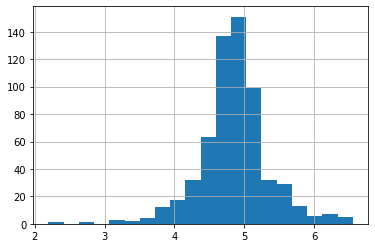

In [79]:
train['Loan_amount_log'].hist(bins=20);

#Label Encoding

In [80]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_amount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [81]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
columns= ['Gender','Married','Education','Self_Employed','Property_Area']
for col in columns:
    train[col]= le.fit_transform(train[col])

#Train-Test Split

In [82]:
#Specify input and output attributes
X = train.drop(columns=['Loan_Status'] , axis=1)
y=train['Loan_Status']

In [83]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test =train_test_split(X,y , test_size= 0.25, random_state= 42)

#Model training

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
def classify(model,X,y):
    X_train , X_test , y_train,y_test =train_test_split(X,y , test_size= 0.25, random_state= 42)
    model.fit(X_train,y_train)
    print('Accuracy is:', model.score(X_test ,y_test)*100)
    #cross validation cv-5,train-4,test-1
    score= cross_val_score(model,X,y, cv=5)
    print('Cross validation is ', np.mean(score)*100)


In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X,y)

Accuracy is: 77.27272727272727
Cross validation is  79.9666799946688


In [87]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is: 66.23376623376623
Cross validation is  73.77982140477143


In [88]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is: 78.57142857142857
Cross validation is  78.17672930827669


In [89]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is: 75.97402597402598
Cross validation is  75.89497534319605


#Confusion Matrix

In [90]:
model=LogisticRegression()
model.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
from sklearn.metrics import confusion_matrix
y_pred= model.predict(X_test)
cm= confusion_matrix(y_test , y_pred)
cm

array([[27, 27],
       [ 4, 96]])

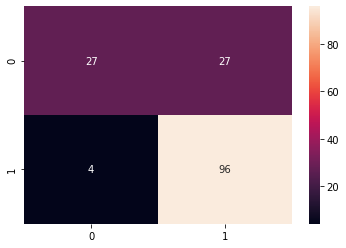

In [92]:
sns.heatmap(cm , annot=True )